# HR Analytics

## Problem Statement 
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1. They first identify a set of employees based on recommendations/ past performance.

2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.

3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion.

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

### Dataset Description

**Variable** - Definition

**employee_id** - Unique ID for employee

**department** - Department of employee

**region** - Region of employment (unordered)

**education** - Education Level

**gender** - Gender of Employee

**recruitment_channel** - Channel of recruitment for employee

**no_of_trainings** - no of other trainings completed in previous year on soft skills, technical skills etc.

**age** - Age of Employee

**previous_year_rating** - Employee Rating for the previous year

**length_of_service** - Length of service in years

**KPIs_met >80%** - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

**awards_won?** - if awards won during previous year then 1 else 0

**avg_training_score** - Average score in current training evaluations

**is_promoted** - (Target) Recommended for promotion

In [93]:
# importing the required librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [101]:
# loading the dataset and reading csv
train = pd.read_csv(r"C:\Users\harsh\Downloads\train_LZdllcl.csv")
test = pd.read_csv(r"C:\Users\harsh\Downloads\test_2umaH9m.csv")
sub = pd.read_csv(r"C:\Users\harsh\Downloads\sample_submission_M0L0uXE.csv")

In [102]:
# lets check the shape of the dataset
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [103]:
df = pd.concat((train,test),ignore_index=True)

In [104]:
#taking a peek into dataframe
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [105]:
# the number of rows and columns in a dataset
print(df.shape)
print('No. of Row in the dataset are: ',df.shape[0])
print('No. of Columns in the dataset are:',df.shape[1])

(78298, 14)
No. of Row in the dataset are:  78298
No. of Columns in the dataset are: 14


In [106]:
# statistics for all columns of the dataset
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [107]:
#columns names in the dataset
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [108]:
df.nunique()

employee_id             78298
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [109]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


## Univariate Analysis

In [110]:
df.select_dtypes(include=object).columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [111]:
df.select_dtypes(include=np.number).columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [112]:
# Categorical Variables
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel','no_of_trainings',
            'previous_year_rating','KPIs_met >80%', 'awards_won?', 'is_promoted']

In [113]:
# Numerical Variables
num_cols = [ 'age','length_of_service', 'avg_training_score']

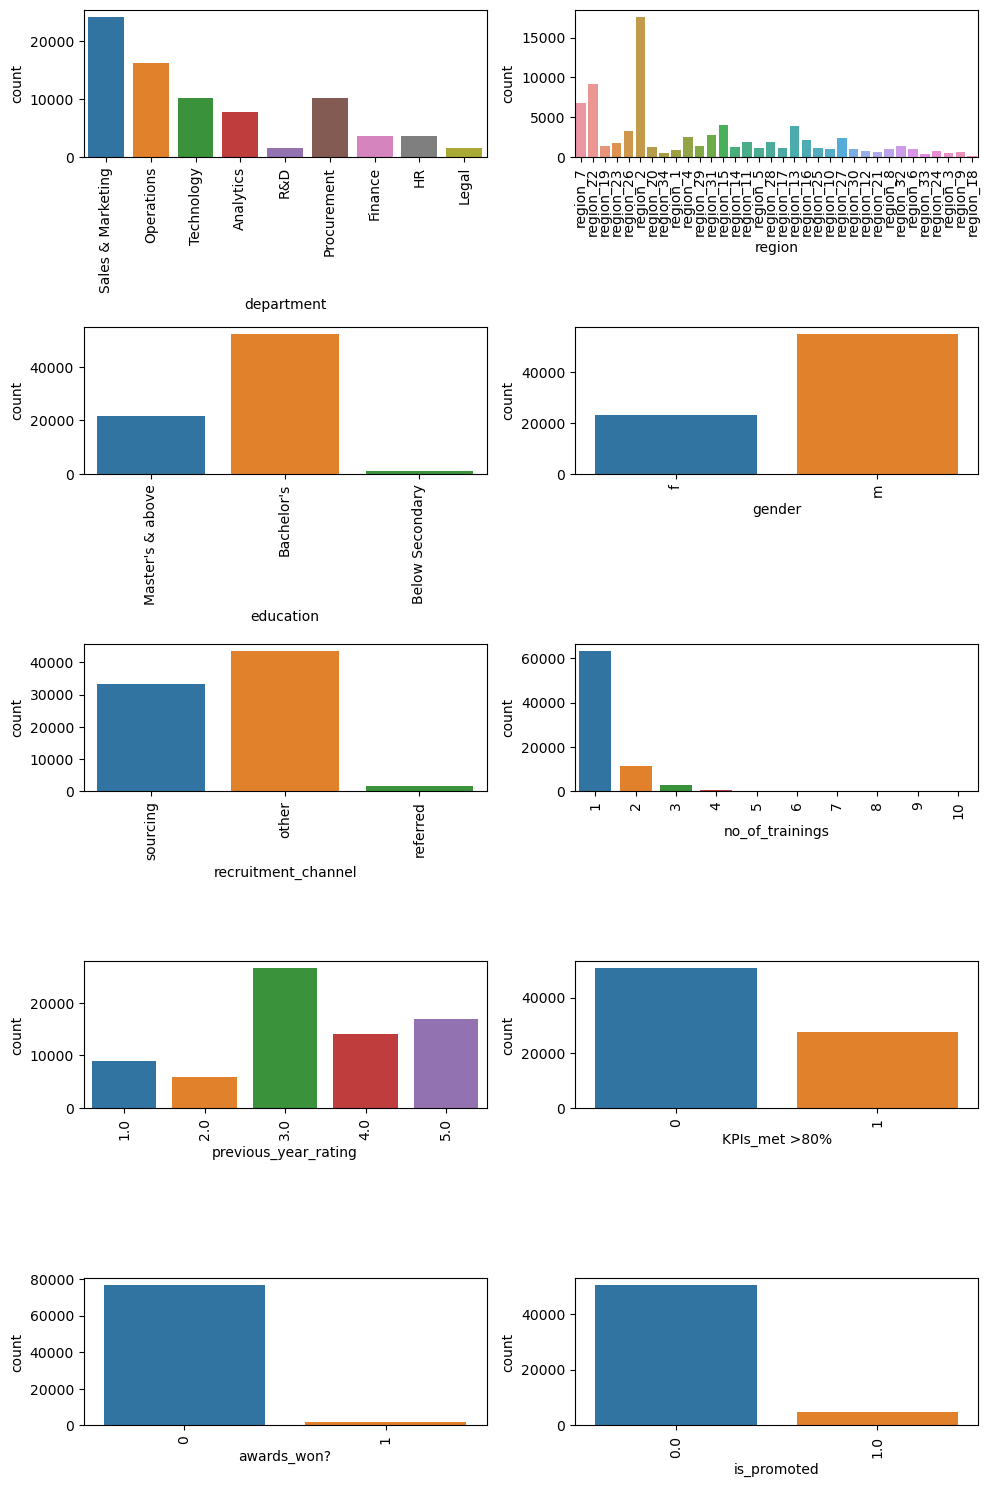

In [114]:
# Univariate Analysis of Categorical Variables
plt.figure(figsize=(10,15))
t=1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(df[i])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()    
    

### Inference of Univariate Analysis of Categorical Variables

 1. **Sales&Marketing, Operation** Department has the highest no. of employees and **R&D & Legal** department has least no. of employees.
 2. **region_2** has highest no. of employees.
 3. Majority of employees have **bachelor's degree.**
 4. Majority of employees are **Male.**
 5. Majority of employees are recruited through the **other channel.**
 6. Majority of employees have only **1 no._of_training.**
 7. Previous Year rating of Majority of employees was **3.0.**
 8. Majority of employees do not meet the **KPI>80 category.**
 9. There are very less people who won the awards.
 10. There are very few promotions.

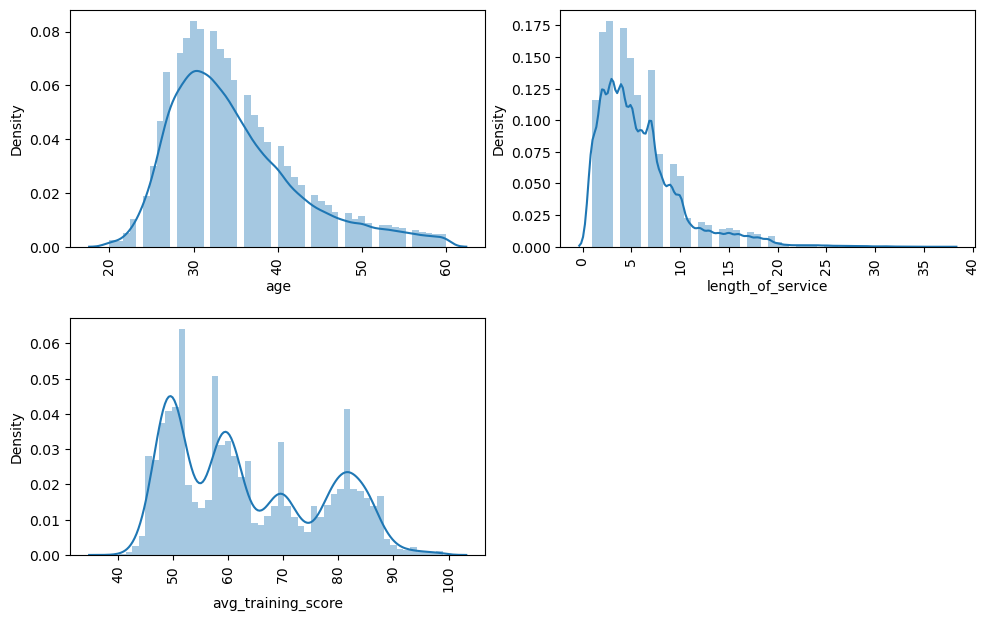

In [115]:
# Univariate Analysis of Numerical Variables
plt.figure(figsize=(10,15))
t=1
for i in num_cols:
    plt.subplot(5,2,t)
    sns.distplot(df[i])
    t+=1
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()    
    

### Inference of Univariate Analysis of Numerical Variables

1. Majority of employees are of age 28 to 38.
2. Majority of employees have experience between 3 to 6 years.
3. The avg_training_score is a multimodal data. The employees have scored between 40 to 100 marks.

## Bivariate Analysis

### Cat vs Cat

In [116]:
cat_cols

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

<Figure size 400x500 with 0 Axes>

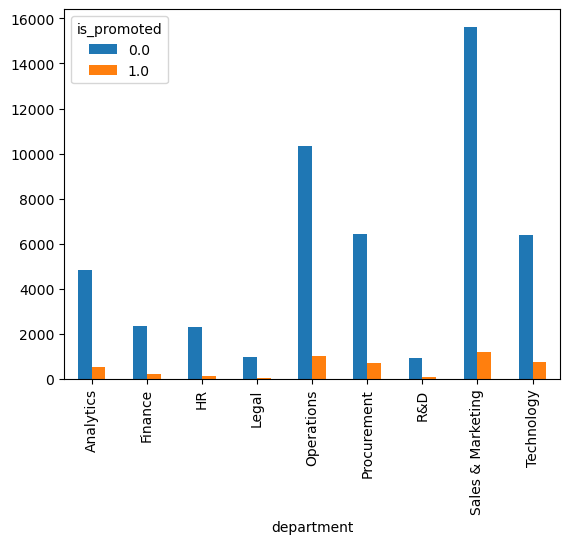

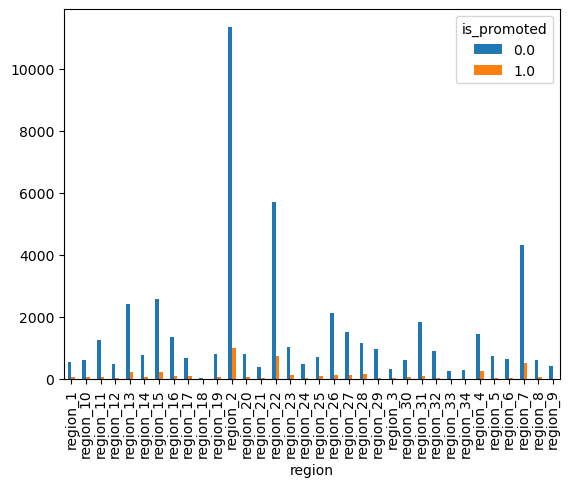

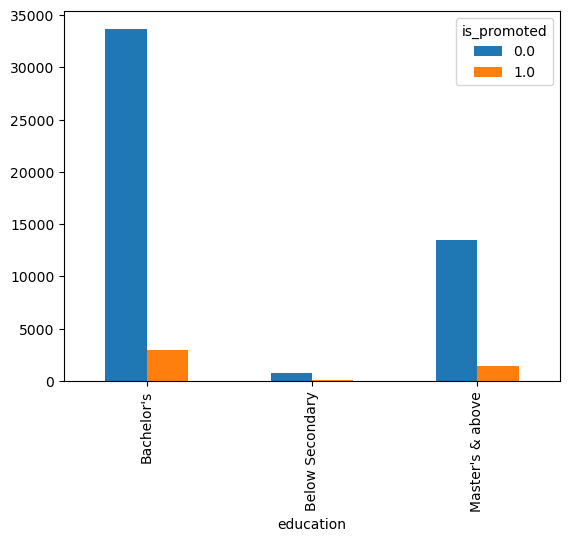

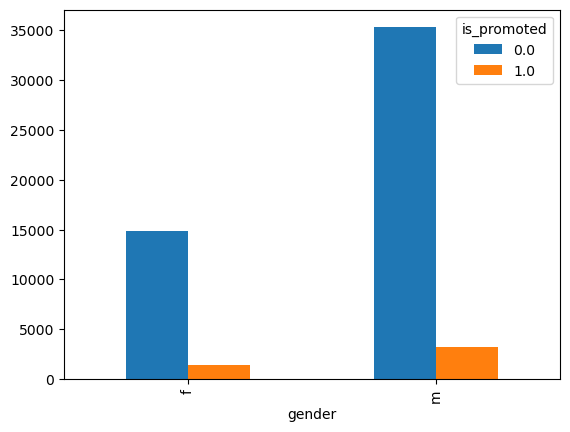

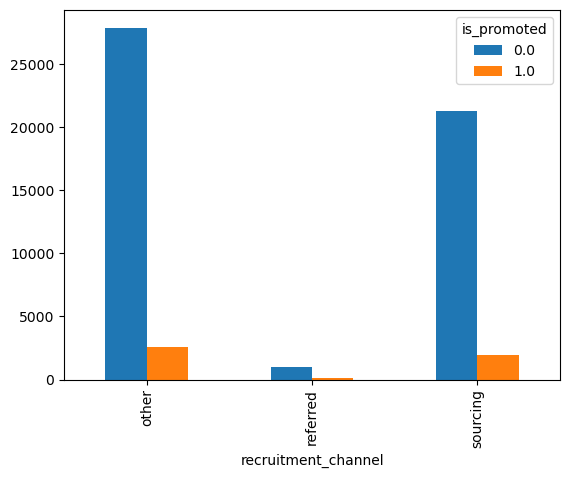

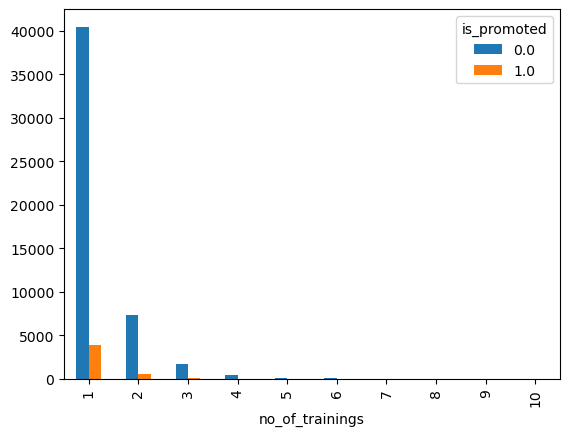

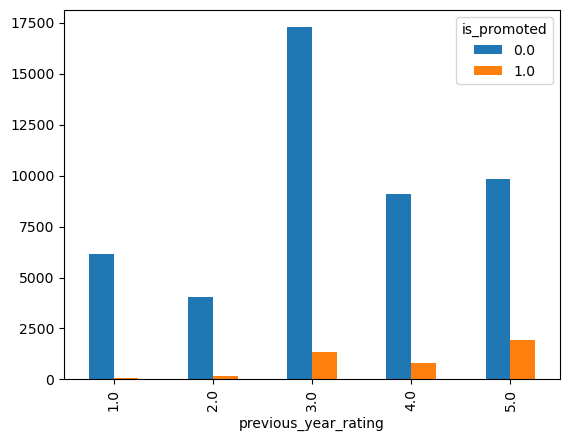

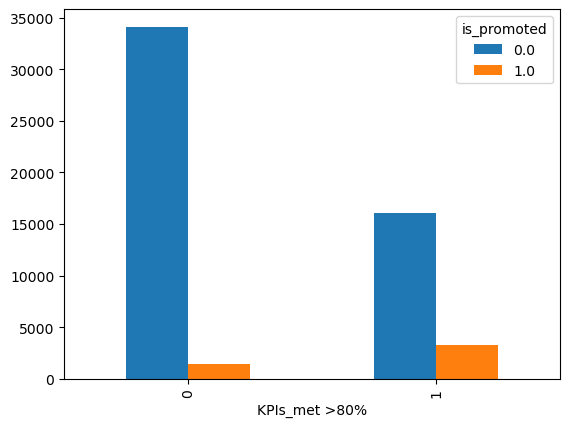

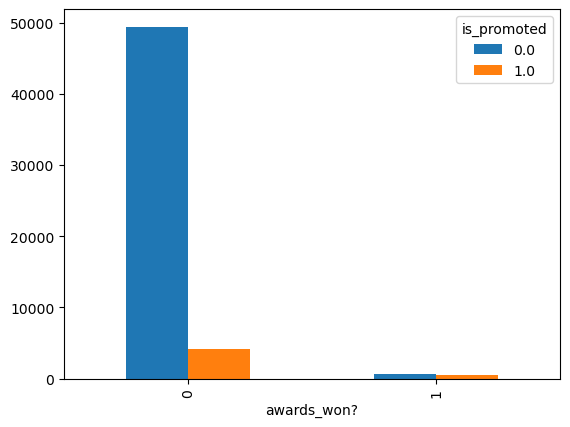

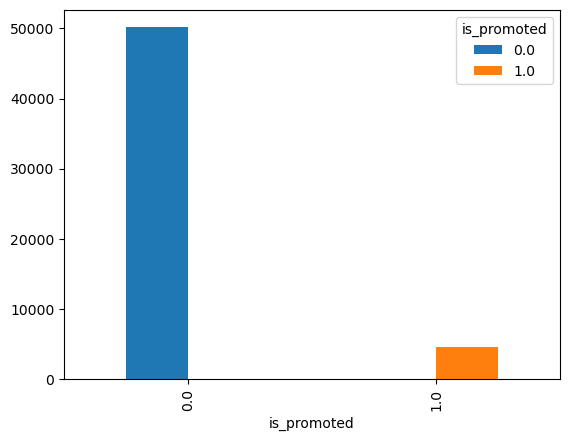

In [117]:
plt.figure(figsize=(4,5))
t=1
for i in cat_cols:
    pd.crosstab(df[i],df['is_promoted']).plot(kind='bar')
plt.show()    

### Infereces for Bivariate Analysis Cat vs Cat (Tgt)

1. Employees from Operations,Sales&Marketing,Procurement,Technology departments have high number of promotions.

2. Legal and R&D have the least promotions.

3. Employees working in region_2,region_22,region_7 have high no. of promotions.

4. Employees from Bachelor's degree and Master's & above education have higher chances of promotions.

5. Employees with education below Secondary have almost negligible chances of promotions.

6. Male Employees have higher chances of promotions.

7. Employees from other,sourcing recruitment_channel have higher chances of promotions.

8. Employees who are referred have very low chances of promotions.

9. Employees with no_of_trainings 1 have very high chances of promotions.

10. With increasing no_of_trainings, employees have fewer chances of promotions.

11. Employees with rating 5 and 3 have highest chances of promotions.

12. Employees with rating 1 and 2 have lowest chances of promotions.

13. Employees with KPIs_met>80% have greater chances of promotions.

14. Employees with no awards have higher chances of promotions.

### Num vs Cat

In [118]:
num_cols

['age', 'length_of_service', 'avg_training_score']

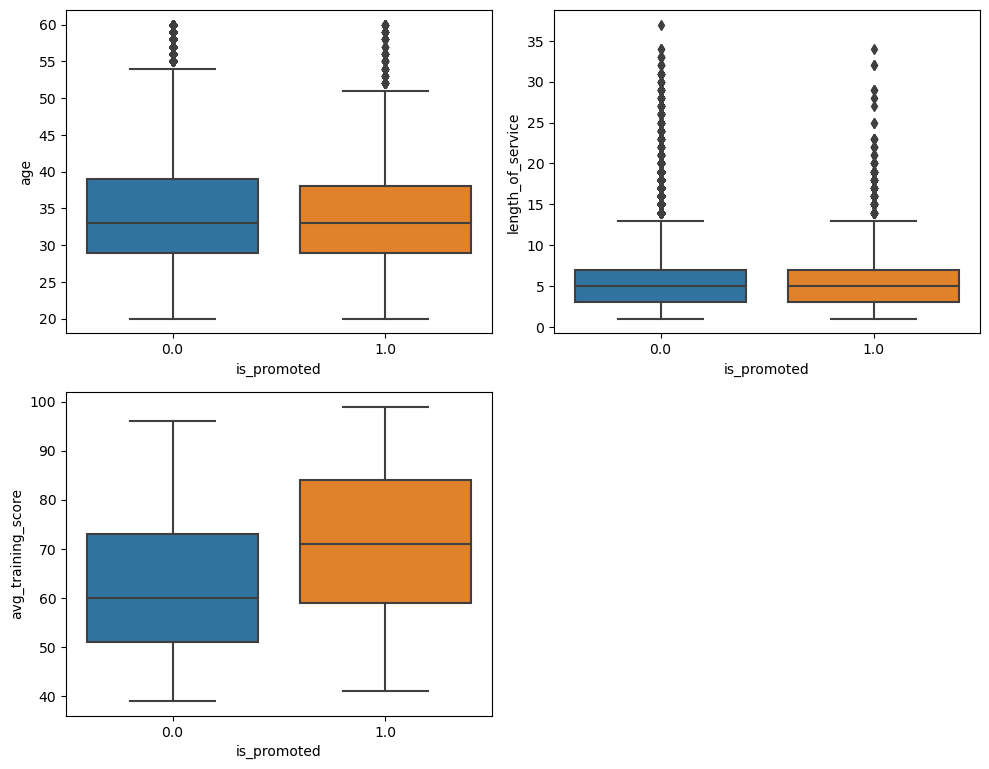

In [119]:
plt.figure(figsize=(10,15))
t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(df['is_promoted'],df[i])
    t+=1
plt.tight_layout()
plt.show()

### Inferences for Bivariate Analysis Num vs Cat(tgt)
1. Employees from all ages have chances of promotion. Age has many outliers.

2. Length of service does not much affect the promotions.

3. Employees with higher avg_training_score have higher chances of promotions. 

## Missing Value

In [120]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [121]:
# Checking data completeness
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
employee_id,0,0.0
department,0,0.0
region,0,0.0
education,3443,4.0
gender,0,0.0
recruitment_channel,0,0.0
no_of_trainings,0,0.0
age,0,0.0
previous_year_rating,5936,8.0
length_of_service,0,0.0


In [122]:
# education
df['education'].value_counts()


Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [123]:
df['education'].isnull().sum()

3443

In [124]:
df['education'].mode()[0]

"Bachelor's"

In [125]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [126]:
df['education'].isnull().sum()

0

In [127]:
#previous_year_rating
df['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [128]:
df['previous_year_rating'].isnull().sum()

5936

In [129]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [130]:
df['previous_year_rating'].isnull().sum()

0

In [131]:
# after treatment 
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

## Feature Engineering 

In [132]:
df['magic1']=df.groupby('department')['employee_id'].transform('nunique')

## Train-Test Split

In [133]:
df.drop(['employee_id'],axis=1,inplace=True)

In [134]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [135]:
newtrain = df.loc[0:train.shape[0]-1, :]

newtest = df.loc[train.shape[0]:, :]

In [136]:
edu_dict={"Master's & above":3,"Bachelor's":2,"Below Secondary":1}
newtrain['education']=newtrain.education.map(edu_dict)
newtest['education']=newtest.education.map(edu_dict)

## Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain['magic1']=sc.fit_transform(pd.DataFrame(newtrain['magic1']))
newtest['magic1']=sc.transform(pd.DataFrame(newtest['magic1']))

In [138]:
newtest.drop("is_promoted", axis = 1, inplace = True)

In [139]:
newtrain.shape,newtest.shape

((54808, 14), (23490, 13))

## Encoding 

In [140]:
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [141]:
dummytrain.shape,dummytest.shape

((54808, 54), (23490, 53))

## Random Forest Model

In [142]:
from sklearn.ensemble import RandomForestClassifier

X = dummytrain.drop("is_promoted", axis = 1)
y = dummytrain['is_promoted']

rf = RandomForestClassifier(criterion = "entropy")
pred = rf.fit(X, y).predict(dummytest)

In [149]:
# Submission File

sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":pred})

In [150]:
sub.is_promoted=soln.is_promoted.astype(dtype=int)

In [151]:
sub.is_promoted.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int32

In [153]:
# Export it outside
sub.to_csv("BaseModel_rf.csv", index = False)     #0.44
  

In [154]:
cd

C:\Users\harsh


## Decision Tree 

In [148]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=None)
pred=dt.fit(X,y).predict(dummytest)

In [155]:
# Submission File

sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":pred})

In [156]:
sub.is_promoted=soln.is_promoted.astype(dtype=int)

In [157]:
sub.is_promoted.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int32

In [160]:
# Export it outside
sub.to_csv("BaseModel_dt.csv", index = False)     #0.44
  

In [159]:
cd

C:\Users\harsh


In [161]:
# apply smote

In [162]:
# ! pip install imblearn
from imblearn.over_sampling  import ADASYN ,SMOTE
sm = SMOTE()
ad = ADASYN()

In [163]:
adx,ady=ad.fit_resample(X,y)

In [164]:
# Applying the Random forest after applying the smote

rf=RandomForestClassifier(criterion="entropy")
#dt = DecisionTreeClassifier(max_depth=None)
pred_ad=dt.fit(adx,ady).predict(dummytest)

In [165]:
# Submission File

sub = pd.DataFrame({"employee_id":test.employee_id, 
                     "is_promoted":pred_ad})

In [167]:
sub.is_promoted=soln.is_promoted.astype(dtype=int)

In [168]:
sub.is_promoted.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int32

In [170]:
# Export it outside
sub.to_csv("adasyn_rf.csv", index = False)